In [1]:
import warnings
warnings.filterwarnings("ignore")

In [4]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.datasets import fashion_mnist

In [8]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [10]:
#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [11]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

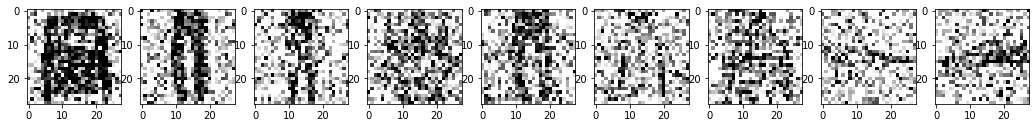

In [12]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

In [14]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0504 - val_loss: 0.0312
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0289 - val_loss: 0.0270
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0260 - val_loss: 0.0253
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0247 - val_loss: 0.0247
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0239 - val_loss: 0.0236
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0233 - val_loss: 0.0232
Epoch 7/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0229 - val_loss: 0.0228
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0225 - val_loss: 0.0225
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0223 - val

In [15]:
model.evaluate(x_test_noisy, x_test)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.0221


0.022062554278969766

In [16]:
model.save('denoising_autoencoder.model')

In [17]:
no_noise_img = model.predict(x_test_noisy)

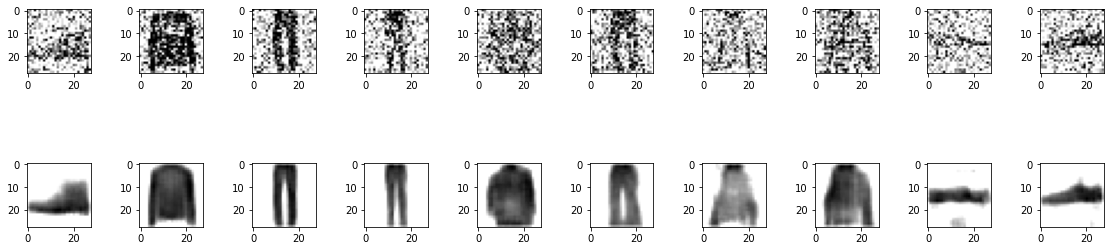

In [18]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display after noise removed
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()